In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [25]:
additional = ['ChildrenId', 'Vision', 'Hearing', 'Walking/Climbing', 'MemoryConcentration', 'Selfcare', 'CommunicationIssue', 'Safety Status Category', 'WillingnessInCUC?', 'HasTelevision', 'HasMotorcycle', 'HasCar', 'HasBed', 'SafeAtSchool', 'SafeAtHome', 'FeelingSad', 'Village']
features = ['Gender', 'SchoolId', 'Cycle 2', 'Project', 'Baseline']
targets = ['Baseline', 'EoR1', 'EoR2', 'EoR3', 'Endline',
           'Baseline_Endline', 'Baseline_EoR1', 'EoR1_EoR2', 'EoR2_EoR3', 'EoR2_Endline',
           'ImproveToLevel4Level5', 'Level4Achieved', 'Level5Achieved', 'AtLeastAchievedLevel4']
intervene = ['ImproveToLevel4Level5']

In [26]:
df_ug = pd.read_excel('../raw data/Uganda - 2024 10 02(v1).xlsx', sheet_name='ug_fact_numeracy_result')
reg_ug = pd.read_excel('../raw data/Uganda - 2024 10 02(v1).xlsx', sheet_name='ug_fact_student_registrations')
df_add = pd.read_excel('../raw data/Uganda-Additional Data - 2024 10 15.xlsx')
df_ug.to_csv('numericy.csv')

df_merged = pd.merge(df_ug, reg_ug[['ChildID', 'SchoolID', 'ClassID', 'ParentTypeId', 'Grade', 'Age', 'AcademicTermDetailsId']], left_on='ChildrenId', right_on='ChildID', how='left')
df_merged = pd.merge(df_merged, df_add[additional], left_on='ChildrenId', right_on='ChildrenId', how='left')
data_original = df_merged.copy()

In [27]:
data_original.columns

Index(['ChildrenId', 'AcademicYearName', 'AcademicYearId', 'Project', 'Year',
       'Baseline', 'EoR1', 'EoR2', 'EoR3', 'Endline', 'Baseline_Endline',
       'Baseline_EoR1', 'EoR1_EoR2', 'EoR2_EoR3', 'EoR2_Endline',
       'ImproveToLevel4Level5', 'Level4Achieved', 'Level5Achieved',
       'AtLeastAchievedLevel4', 'Gender', 'IsCUCSatisfied?', 'Cycle 2',
       'Identity_Number', 'SchoolId', 'ChildID', 'SchoolID', 'ClassID',
       'ParentTypeId', 'Grade', 'Age', 'AcademicTermDetailsId', 'Vision',
       'Hearing', 'Walking/Climbing', 'MemoryConcentration', 'Selfcare',
       'CommunicationIssue', 'Safety Status Category', 'WillingnessInCUC?',
       'HasTelevision', 'HasMotorcycle', 'HasCar', 'HasBed', 'SafeAtSchool',
       'SafeAtHome', 'FeelingSad', 'Village'],
      dtype='object')

In [52]:
main_features = ['ChildrenId', 'AcademicYearId', 'Project', 'Year', 'Gender', 
                 'Baseline', 'Cycle 2', 'SchoolID', 'ClassID',
                 'ParentTypeId', 'Grade', 'Age', 'AtLeastAchievedLevel4']
df_merged = data_original.copy()
df_merged = df_merged[main_features].dropna()

In [53]:
# RF classifier

X = pd.get_dummies(df_merged[main_features[:-1]], drop_first=True) 
y = df_merged['AtLeastAchievedLevel4'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report_dict = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report_dict).transpose()
classification_report_df

,precision,recall,f1-score,support
0,0.918969,0.878521,0.898290,568.000000
1,0.861167,0.906780,0.883385,472.000000
accuracy,0.891346,0.891346,0.891346,0.891346
macro avg,0.890068,0.892650,0.890837,1040.000000
weighted avg,0.892736,0.891346,0.891525,1040.000000


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=10)
fit = k_best.fit(X, y)
print(fit.scores_)

[2.87163898e+02 1.67860326e+02 8.62012457e+02 7.50390392e-01
 3.48358544e+02 8.89084584e+00 4.91009701e+01 8.53460096e-01
 1.91023680e-02 1.87363110e-01 2.26733898e+01 9.06915591e+01
 5.62640092e+02 2.47402378e+00 2.37524574e+01 3.89888055e+02
 5.87287848e+00 1.15710287e+00 1.34837154e+01 6.67746997e-01]


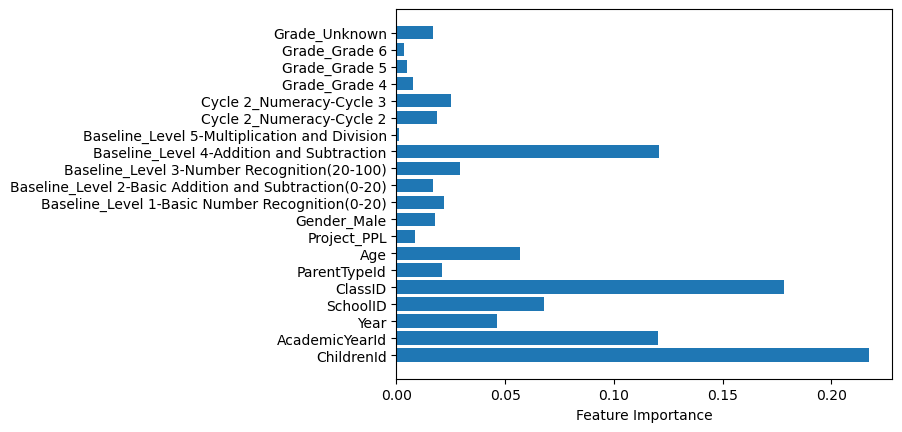

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import numpy as np

data = df_merged.copy()

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data.drop(columns=['ChildrenId', 'AtLeastAchievedLevel4'])
y = data['AtLeastAchievedLevel4'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
selector = RFE(logreg, n_features_to_select=1, step=1)  # Select features stepwise
selector = selector.fit(X_train, y_train)

feature_ranking = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_}).sort_values(by='Rank')
feature_ranking.reset_index(drop=True, inplace=True)

selected_features = feature_ranking[feature_ranking['Rank'] == 1]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

feature_ranking, accuracy


/opt/homebrew/Caskroom/miniforge/base/envs/cq1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(           Feature  Rank
 0          Cycle 2     1
 1         Baseline     2
 2          Project     3
 3   AcademicYearId     4
 4     ParentTypeId     5
 5            Grade     6
 6           Gender     7
 7              Age     8
 8             Year     9
 9          ClassID    10
 10        SchoolID    11,
 0.6644230769230769)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.reset_index(drop=True, inplace=True)
feature_importances, rf_accuracy


(           Feature  Importance
 0          ClassID    0.262702
 1         Baseline    0.233557
 2   AcademicYearId    0.131634
 3              Age    0.079116
 4         SchoolID    0.077138
 5          Cycle 2    0.065537
 6             Year    0.047655
 7            Grade    0.037865
 8     ParentTypeId    0.025674
 9           Gender    0.025283
 10         Project    0.013839,
 0.8971153846153846)